In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import torch
from icecream import ic
from tqdm.notebook import tqdm

import ch4
import ch7

%load_ext autoreload
%autoreload 2

# 7.4

In [2]:
state = (2, 0)
x = ch7.one_hot(state)
ic(x.shape)
_ = ic(x)

ic| x.shape: torch.Size([1, 12])
ic| x: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])


In [3]:
qnet = ch7.QNet()

state = (2, 0)
state = ch7.one_hot(state)

qs = qnet(state)
ic(qs.shape)

ic| qs.shape: torch.Size([1, 4])


torch.Size([1, 4])

In [4]:
ch7.QLearningAgent().get_action(ch7.one_hot((1, 0)))

0

In [5]:
env = ch4.GridWorld()
agent = ch7.QLearningAgent()

episodes = 1_000
loss_history = []

for episode in tqdm(range(1, episodes + 1)):
    state = env.reset()
    state = ch7.one_hot(state)
    total_loss, cnt = 0, 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        next_state = ch7.one_hot(next_state)

        loss = agent.update(state, action, reward, next_state, done)
        total_loss += loss
        cnt += 1
        state = next_state

    avg_loss = total_loss / cnt
    loss_history.append(avg_loss)

    if episode % 100 == 0:
        ic(episode)
        ic(loss)
        ic(avg_loss)

  0%|          | 0/1000 [00:00<?, ?it/s]

ic| episode: 100
ic| loss: tensor(0.0057)
ic| avg_loss: tensor(0.0016)
ic| episode: 200
ic| loss: tensor(0.0061)
ic| avg_loss: tensor(0.0058)
ic| episode: 300
ic| loss: tensor(0.0020)
ic| avg_loss: tensor(0.0012)
ic| episode: 400
ic| loss: tensor(0.0006)
ic| avg_loss: tensor(0.0003)
ic| episode: 500
ic| loss: tensor(0.0002)
ic| avg_loss: tensor(7.3491e-05)
ic| episode: 600
ic| loss: tensor(0.0005)
ic| avg_loss: tensor(0.0002)
ic| episode: 700
ic| loss: tensor(7.4360e-05)
ic| avg_loss: tensor(7.6857e-05)
ic| episode: 800
ic| loss: tensor(5.9597e-05)
ic| avg_loss: tensor(0.0003)
ic| episode: 900
ic| loss: tensor(6.8962e-06)
ic| avg_loss: tensor(3.6644e-06)
ic| episode: 1000
ic| loss: tensor(2.8484e-05)
ic| avg_loss: tensor(9.8158e-05)


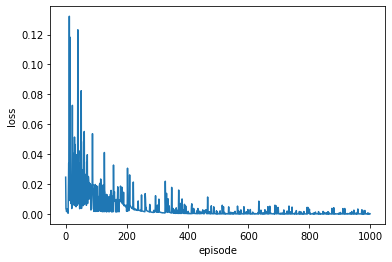

In [6]:
fig, ax = plt.subplots(1, 1)

ax.set_xlabel("episode")
ax.set_ylabel("loss")
ax.plot(range(episodes), loss_history)

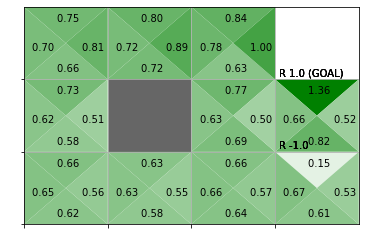

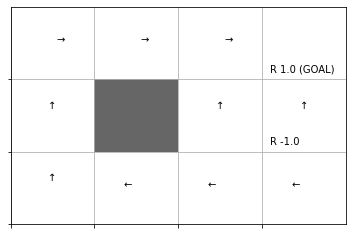

In [7]:
# visualize policy
Q = {}

for state, action in product(env.states(), env.action_space):
    q = agent.qnet(ch7.one_hot(state))[:, action]
    Q[state, action] = float(q.data)
env.render_q(Q)